# Data: Fairfax County Fire and Rescue Department call data and patient demographics 
Team: Fairfax Consultants

In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")
#pip install nbconvert #or conda install nbconvert  #to save the notebook as .pdf
#nbconvert[webpdf]
#pip install pyppeteer
#https://github.com/jgm/pandoc/releases/tag/2.18

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#Check the version
!jupyter --version
!python --version

Selected Jupyter core packages...
IPython          : 8.3.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : 1.17.1
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.11
qtconsole        : 5.3.1
traitlets        : 5.1.1
Python 3.8.11


In [3]:
#Import libraries
import os

import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import math
#Import Viz libraries


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Altair can be installed, along with the example datasets in vega_datasets, using:$ pip install altair vega_datasets
#https://altair-viz.github.io/gallery/index.html

import altair as alt #pip install altair (from anaconda Powershell)
from vega_datasets import data # pip install vega_datasets/ #Only to use data from vegas data sets or else can be ignored

#To avoid MaxRowsError: in big data sets with altair
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
#alt.renderers.enable('notebook') #$ pip install vega #https://altair-viz.github.io/user_guide/display_frontends.html

#pip install altair_viewer
#alt.renderers.enable('altair_viewer') 
#pip install altair_saver #to save interactive charts with interactive elements

#alt.renderers.enable('svg') #renders the chart as a static svg image within a Jupyter notebook.
#chart.save('chart.html', embed_options={'renderer':'svg'}) #o change to svg rendering, use the embed_options as such

DataTransformerRegistry.enable('json')

In [4]:
#Import all sheet by index
# # Set current working directory
# os.chdir("C:\\Users\\matth\\OneDrive\\Documents\\GMU\\DAEN 690\\Sponsor Files")
#df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])

df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3])

# # reading csv file and at a same time using converters attribute which will remove extra space
# df = pd.read_csv('\\student_data.csv', converters={'Name': str.strip(),
#                                                 'Blood Group' : str.strip(),
#                                                 'Gender' : str.strip() } )

#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [5]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [6]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis  \
0                          NaN   

                                   HospitalDiagnosi

In [7]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeV

In [8]:
#Count Nulls
print(PatDemo.isnull().sum())

Patient_ID_Internal         0
PatientRace              5782
PatientEthnicity         5782
Patient_Race_List_Raw    5782
PatientSex               5780
PatientGender            5780
Patient_Gender_Raw       5780
IsJuvenileUnder18           0
IsSenior65+                 0
AgeGroup_HIPAA           5786
dtype: int64


<AxesSubplot:>

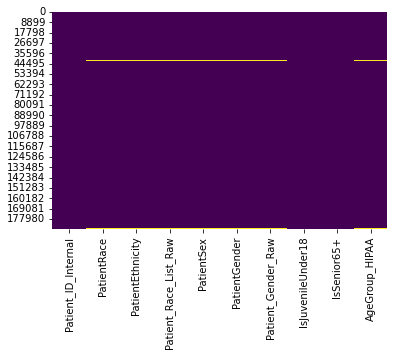

In [9]:
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PatDemo.isnull(),cbar=False,cmap='viridis')

In [10]:
#Check if any columns or values are duplicated.

print("\n If any column header redundant?:",PatDemo.columns.duplicated())
print("\n Sex & Gender Duplicated?   : ",PatDemo['PatientSex'].equals(PatDemo['PatientGender']))
print("\n Race Duplicated?           : ",PatDemo['Patient_Race_List_Raw'].equals(PatDemo['PatientRace']))
print("\n Gender and GRaw Duplicated?: ",PatDemo['Patient_Gender_Raw'].equals(PatDemo['PatientGender']))

#PatDemo.columns
#even if logicaltest says not duplicated, it is okay to delete 'PatientSex',  'Patient_Gender_Raw', 'Patient_Race_List_Raw'


 If any column header redundant?: [False False False False False False False False False False]

 Sex & Gender Duplicated?   :  False

 Race Duplicated?           :  False

 Gender and GRaw Duplicated?:  False


In [11]:
#drop reduntant columns
PatDemo.drop(["Patient_Race_List_Raw", "Patient_Gender_Raw",'PatientGender'], axis =1,  inplace =True)
PatDemo.head(2)

,Patient_ID_Internal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [12]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)

In [13]:
#Count of unique values in each rows for each column
  
print("No.of.unique values in each column :\n", PatDemo.nunique(axis=0))

No.of.unique values in each column :
 PtIDInternal         186865
PatientRace               7
PatientEthnicity          2
PatientSex                3
IsJuvenileUnder18         2
IsSenior65+               2
AgeGroup_HIPAA           11
dtype: int64


In [14]:
#read unique values, how many patients under particular age group

#print("\n unique values: ", PatDemo['AgeGroup_HIPAA'].unique() )
#print("\n Count of unique values: ", len(PatDemo['AgeGroup_HIPAA'].unique()))
#print("\n Count of unique values: ", PatDemo.AgeGroup_HIPAA.nunique())
#print("\n Count of each unique values: ", list(PatDemo.AgeGroup_HIPAA.value_counts()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
2022-10-19 00:00:00     8909
20-29                  16537
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
Name: PtIDInternal, dtype: int64


In [15]:
#Convert AgeGroup_HIPAA to string to get rid of datetime format value
PatDemo['AgeGroup_HIPAA']= PatDemo['AgeGroup_HIPAA'].astype('str')
#print("\n sorted age group:",sorted(PatDemo['AgeGroup_HIPAA'].unique()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
20-29                  16537
2022-10-19 00:00:00     8909
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
nan                     5786
Name: PtIDInternal, dtype: int64


In [16]:
#check the data types for rest of the columns
print(PatDemo.info())
print("\n details: \n",PatDemo['AgeGroup_HIPAA'].describe())
# PatDemo.dtypes
# PatDemo.index
# PatDemo.shape
# PatDemo.memory_usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186865 entries, 0 to 186864
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PtIDInternal       186865 non-null  int64 
 1   PatientRace        181083 non-null  object
 2   PatientEthnicity   181083 non-null  object
 3   PatientSex         181085 non-null  object
 4   IsJuvenileUnder18  186865 non-null  int64 
 5   IsSenior65+        186865 non-null  int64 
 6   AgeGroup_HIPAA     186865 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.0+ MB
None

 details: 
 count     186865
unique        12
top        70-79
freq       26567
Name: AgeGroup_HIPAA, dtype: object


In [17]:
#Replace '2022-10-19 00:00:00' with 10-19 and nan with Unk, my logic is even NULL is also unknown in a way

PatDemo["AgeGroup_HIPAA"] = PatDemo["AgeGroup_HIPAA"].replace({'2022-10-19 00:00:00':'10_19','20-29':'20_29','50-59':'50_59', 
                                                               '80-89':'80_89','70-79':'70_79','40-49':'40_49','Under 10':'<10', 
                                                               '60-69':'60_69','30-39':'30_39', 'nan':'Unk'})

#sorted(PatDemo["AgeGroup_HIPAA"].unique())
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())
# Total=sum(PatDemo['AgeGroup_HIPAA'].value_counts(dropna=True))
# Total
# PatDemo.AgeGroup_HIPAA.value_counts(dropna=True)


 Count of each unique values:  AgeGroup_HIPAA
10_19     8909
20_29    16537
30_39    19237
40_49    17861
50_59    22475
60_69    24507
70_79    26567
80_89    26102
90+      12476
<10       6403
Unk       5791
Name: PtIDInternal, dtype: int64


# Lets try some vizualizations for demography distributions:

[Text(0, 0, 'Under 10'),
 Text(1, 0, '10-19'),
 Text(2, 0, '20-29'),
 Text(3, 0, '30-39'),
 Text(4, 0, '40-49'),
 Text(5, 0, '50-59'),
 Text(6, 0, '60-69'),
 Text(7, 0, '70-79'),
 Text(8, 0, '80-89'),
 Text(9, 0, '90+'),
 Text(10, 0, 'Unk')]

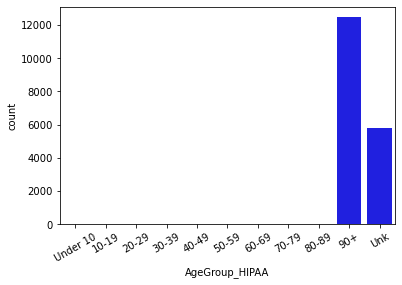

In [18]:
## count plot for age demographics
age_plot = sns.countplot(data = PatDemo, x = 'AgeGroup_HIPAA', 
              order = ['Under 10', '10-19', '20-29', '30-39', '40-49', '50-59',
                       '60-69', '70-79', '80-89', '90+','Unk'],
              color = 'b')
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 30)

In [19]:
#Age group distribution among different demographies

import altair as alt


source = PatDemo

PtDemchart1 = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientEthnicity:N'
)


# PtDemchart2 = alt.Chart(PatDemo).mark_bar().encode(
#      y='AgeGroup_HIPAA',
#      x='count(AgeGroup_HIPAA)',
#     color='PatientRace:N'
#  )

PtDemchart3 = alt.Chart(PatDemo).mark_bar().encode(
     x='AgeGroup_HIPAA:O',
     y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N'
 )


PtDemchart1 | PtDemchart3#PtDemchart2|



alt.HConcatChart(...)

In [20]:
#interactive brush selection charts
import altair as alt
from vega_datasets import data
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')

source = PatDemo
brush = alt.selection(type='interval')

alt.Chart(source).mark_point().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color=alt.condition(brush, 'PatientRace:O', alt.value('grey')),
).add_selection(brush)

alt.Chart(...)

In [21]:
#interactive Charts

import altair as alt
from vega_datasets import data

source = PatDemo
selection = alt.selection_multi(fields=['PatientSex'], bind='legend')
PatDemChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    column='PatientRace:N',
    tooltip=['PatientEthnicity', 'PatientSex', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
)
PatDemChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

In [22]:
#Interactive Agegroup distribution among Patient Race and Gender #https://altair-viz.github.io/gallery/streamgraph.html
import altair as alt
from vega_datasets import data

#source = pd.read_csv("E:\DAEN_690\Data\us-employment.csv")

source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientRace:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex:N','PatientRace:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
  
).add_selection(
    selection
).add_selection(brush).interactive()

#PatDemInteractive.display()
#PatDemInteractive.save('chart.html', embed_options={'renderer':'svg'})
PatDemInteractive.display()
#chart.save('chart.png', scale_factor=2.0) #Size Resolutions

#PatDemInteractive.save('chart.html')

alt.Chart(...)

In [23]:
#Second viz
source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive1= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientEthnicity:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex','PatientEthnicity', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
  
).add_selection(
    selection
).add_selection(brush).interactive()

PatDemInteractive1.display()

alt.Chart(...)

In [24]:
#Age group among gender distribution

import altair as alt
from vega_datasets import data #Only to use data from vegas data sets or else can be ignored

source = PatDemo

Agegroup = alt.Chart(source).mark_circle(size=60).encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    tooltip=['PatientRace:N', 'PatientSex:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
).interactive()
Agegroup.save('Agegroup.html')
Agegroup

alt.Chart(...)

In [25]:
#Binarize the boolen values 
#PatDemo.columns
#Get the boolean values for Patients Sex
PatDemo = pd.get_dummies(PatDemo, columns=['PatientRace', 'PatientEthnicity', 'PatientSex','AgeGroup_HIPAA']) #, drop_first=True) #Since thers only two values male or female.
PatDemo

,PtIDInternal,IsJuvenileUnder18,IsSenior65+,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,...,AgeGroup_HIPAA_20_29,AgeGroup_HIPAA_30_39,AgeGroup_HIPAA_40_49,AgeGroup_HIPAA_50_59,AgeGroup_HIPAA_60_69,AgeGroup_HIPAA_70_79,AgeGroup_HIPAA_80_89,AgeGroup_HIPAA_90+,AgeGroup_HIPAA_<10,AgeGroup_HIPAA_Unk
0,1014525,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1625597,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,818385,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1726959,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1319018,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186860,1627319,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
186861,1016261,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
186862,1226587,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
186863,1326193,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [26]:
#Lets drop redundant columns:
PatDemo.drop(['PatientSex_Male','IsJuvenileUnder18','IsSenior65+'],axis =1,  inplace =True)
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo.rename(columns = {'PatientSex_Female':'PatientSex_FM'}, inplace = True)
PatDemo

,PtIDInternal,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,PatientEthnicity_Hispanic/Latino,PatientEthnicity_Non-Hispanic/Latino,...,AgeGroup_HIPAA_20_29,AgeGroup_HIPAA_30_39,AgeGroup_HIPAA_40_49,AgeGroup_HIPAA_50_59,AgeGroup_HIPAA_60_69,AgeGroup_HIPAA_70_79,AgeGroup_HIPAA_80_89,AgeGroup_HIPAA_90+,AgeGroup_HIPAA_<10,AgeGroup_HIPAA_Unk
0,1014525,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1625597,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,818385,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1726959,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1319018,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186860,1627319,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
186861,1016261,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
186862,1226587,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
186863,1326193,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


# Lets Merge SEPSIS with Patient Demographics

In [27]:
#View Header and count null

print("\n header:\n",SEPSIS.head(2))

print("\n count null before merge:\n", SEPSIS.isnull().sum())



 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  
0  Acute respiratory failure with hypoxia (J96.01...  
1  Presence of urogenital implan

In [28]:
#Check if any columns or values are duplicated.
#SEPSIS['EmergencyDepartmentDiagnosis'].unique()

print("\n If any column header redundant?:",SEPSIS.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",SEPSIS['EmergencyDepartmentDiagnosis'].equals(SEPSIS['HospitalDiagnosis']))


print("\n Primary and Secondary Impression Duplicated?: ",SEPSIS['PrimaryImpression'].equals(SEPSIS['SecondaryImpression']))


# print("\n Race Duplicated?           : ",SEPSIS['Patient_Race_List_Raw'].equals(SEPSIS['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",SEPSIS['Patient_Gender_Raw'].equals(SEPSIS['PatientGender']))



 If any column header redundant?: [False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [29]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
SEPSISclean = SEPSIS

#SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].astype(str).fillna('') + SEPSISclean["HospitalDiagnosis"].astype(str).fillna('')
SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].fillna('') + SEPSISclean["HospitalDiagnosis"].fillna('')

SEPSISclean["Merged_Impression"] = SEPSISclean["PrimaryImpression"].fillna('') + SEPSISclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#SEPSIS.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",SEPSISclean.head(2))

print("\n count null after merge:\n", SEPSISclean.isna().sum())

#SEPSISclean.head(10)


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  \
0  Acute respiratory failure with hypoxia (J96.01...   
1  Presence of urogenital impl

In [30]:
#SEPSISclean.dtypes
print("\n count NaN after merge:\n",SEPSISclean[SEPSISclean == ''].count())
#SEPSISclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                         0
PtIDInternal                      0
PrimaryImpression                 0
SecondaryImpression               0
isOutcomeFacility                 0
SepsisStatus                      0
qSOFA                             0
EmergencyDepartmentDiagnosis      0
HospitalDiagnosis                 0
overall_diagnosis               776
Merged_Impression                 0
dtype: int64


In [31]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1, 
                                #pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("sepsis", na=False), "1",
                                pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0))#)
# sepsis_demo["sepsis_outcome"] = np.where(sepsis_demo["overall_diagnosis"].str.contains("A41.9", na=False, case=False), "1",
#                                 np.where(sepsis_demo["overall_diagnosis"].str.contains("A41.89", na=False, case=False), "1", "0"))


SEPSISclean.head()
#binarize primary Impr
SEPSISclean["ProviderImpression"] = pd.np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=False), 1, 
                               
                             pd.np.where(SEPSISclean["Merged_Impression"].str.contains("A41.9", na=False, case=False), 1, 0))
SEPSISclean.head()
#Accuracy
SEPSISclean["Accuracy"] = pd.np.where(SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"], 1, 0) #Match -1, MisMatch 0
SEPSISclean.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26588\677124588.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1,
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26588\677124588.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0))#)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26588\677124588.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  SEPSISclean["ProviderImpression"] = pd.np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=F

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,None,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,None,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,None,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,Notification,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1


In [32]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

SEPSISclean["Triage0"] = np.where(((SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"])),'Triage','')
SEPSISclean["Triage1"] = np.where(((SEPSISclean["ProviderImpression"] == 1) &  (SEPSISclean["sepsis_outcome"] == 0)),'OverTriage','')
SEPSISclean["Triage2"] = np.where(((SEPSISclean["ProviderImpression"] == 0) &  (SEPSISclean["sepsis_outcome"] == 1)),'UnderTriage','')
SEPSISclean["Triage"] = SEPSISclean["Triage0"].fillna('') + SEPSISclean["Triage1"].fillna('') + SEPSISclean["Triage2"].fillna('')

print('Head: ',SEPSISclean.head())
print('UniqueValue: ',SEPSISclean["Triage"].unique())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                                              

In [33]:
#Check for unique values in each columns

print("\n Merged_Impressions Values: \n", SEPSISclean['Merged_Impression'].unique())
print("\n ProviderImpression Values: \n", SEPSISclean['ProviderImpression'].unique())
print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())
print("\n Unique Sepsis Statusvalues: \n",SEPSISclean['SepsisStatus'].unique())


 Merged_Impressions Values: 
 ['Respiratory - Pulmonary Edema Acute Onset (J81.0)Respiratory - Not Otherwise Listed (J98.9), "Infectious - Sepsis (A41.9)"'
 'Fever (R50.9)GI/GU - Nausea (Without Vomiting) (R11.0)'
 'CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Weakness (R53.1)'
 'Fever (R50.9)Not Applicable'
 'GI/GU - Abdominal Pain/Problem (R10.84)Not Applicable'
 'Infectious - Sepsis (A41.9)Weakness (R53.1), "GI/GU - Nausea (With Vomiting) (R11.2)", "Fever (R50.9)"'
 'Weakness (R53.1)Not Applicable'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)Not Applicable'
 'Infectious - Influenza (Flu Like Symptoms) (J11)Not Applicable'
 'Infectious - Sepsis (A41.9)Respiratory - Not Otherwise Listed (J98.9)'
 'Infectious - Pneumonia (J18.9)Infectious - Influenza (Flu Like Symptoms) (J11)'
 'CV - Hypotension (I95.9)Not Applicable'
 'Infectious - Sepsis (A41.9)Not Applicable'
 'Neuro - Stroke/CVA (I63.9)Not Applicable'
 'Respiratory - Not Otherwise Listed (J98.9)Dehydration (E86.0)'
 'F

In [34]:
#Crete dummies for SepsisStatus
SEPSISclean = pd.get_dummies(SEPSISclean, columns=['SepsisStatus'])#, drop_first=True)
SEPSISclean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0,,OverTriage,,OverTriage,0,0,1
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0,,,UnderTriage,UnderTriage,0,1,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1,Triage,,,Triage,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,0,0,1,Triage,,,Triage,0,0,1
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,1,1,1,Triage,,,Triage,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,0,1,0,,OverTriage,,OverTriage,0,0,1
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,1,0,0,,,UnderTriage,UnderTriage,1,0,0


In [35]:
#To iter through the values/ categories list nan are replaced with Unknown

SEPSISclean["qSOFA"] = SEPSISclean["qSOFA"].fillna('Unknown')
SEPSISclean['qSOFA'].unique()



#Create dummies for qSOFA

# SEPSISclean = pd.get_dummies(SEPSISclean, columns=['qSOFA'])#, drop_first=True) #will create 7 combinations, in fact we have only three criteria.
# SEPSISclean
#following method will identify three condition within the strings.

dummies = SEPSISclean['qSOFA'].str.get_dummies(sep=', ') #(SEPSISclean[variable], prefix = variable)   # Get the dummy variables from pandas
SEPSISclean = pd.concat([SEPSISclean,dummies],axis=1)       # concat dummy variables into original data 
#SEPSISclean.drop(SEPSISclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 
SEPSISclean


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,...,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg,Unknown
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,...,OverTriage,,OverTriage,0,0,1,1,1,0,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,Unknown,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,Unknown,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,Unknown,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,...,,,Triage,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,...,,,Triage,0,0,1,0,1,0,0
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,...,,,Triage,1,0,0,0,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,...,OverTriage,,OverTriage,0,0,1,0,1,0,0
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,...,,UnderTriage,UnderTriage,1,0,0,1,0,1,0


In [36]:
##Drop redundant column 
SEPSISclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'qSOFA','Merged_Impression','Triage1','Triage2','Triage0','Unknown'],
                 axis =1,  inplace =True)
SEPSISclean.head()

,PtIDInternal,isOutcomeFacility,sepsis_outcome,ProviderImpression,Accuracy,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg
0,1393632,1,0,1,0,OverTriage,0,0,1,1,1,0
1,1794780,1,1,0,0,UnderTriage,0,1,0,0,0,0
2,1414144,1,1,0,0,UnderTriage,0,1,0,0,0,0
3,1374795,1,1,0,0,UnderTriage,0,1,0,0,0,0
4,1471075,1,0,0,1,Triage,0,0,1,1,0,1


Merge with Patients Demo Graphic Informations

In [37]:
# merging the files how='inner' by default.
PdmSEPSIS = pd.merge(PatDemo,SEPSISclean, on='PtIDInternal') 
print(PdmSEPSIS.head(3))

#Rearrange the columns
last_cols = ['Accuracy', 'Triage']
first_cols = [col for col in PdmSEPSIS.columns if col not in last_cols]
PdmSEPSIS = PdmSEPSIS[first_cols+last_cols]
print(PdmSEPSIS.head(3))

# #Write as .csv
#PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)
PdmSEPSIS.to_csv("E:\DAEN_690\Data\PdmSEPSIS1.csv",index=False)

   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1522382                         0                  1   
1       1488855                         0                  0   
2       1547651                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        1   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  0                                 0   
1                0                  1                                 0   
2                0                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  ...  sepsis_outcome  \
0                                     1  ...               0   
1

In [38]:
#Lets drop irrelavant  columns:
PdmSEPSIS.drop(['PtIDInternal'],axis =1,  inplace =True)
print(PdmSEPSIS.head(3))
print("\n info: ", PdmSEPSIS.info())

   PatientRace_AK Native/AI  PatientRace_Asian  PatientRace_Black/AA  \
0                         0                  1                     0   
1                         0                  0                     0   
2                         0                  0                     0   

   PatientRace_HI Native/PI  PatientRace_None Listed  PatientRace_TMR  \
0                         0                        0                0   
1                         0                        0                0   
2                         0                        1                0   

   PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                  0                                 0   
1                  1                                 0   
2                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  PatientSex_FM  ...  sepsis_outcome  \
0                                     1              1  ...               0   
1                          

<AxesSubplot:>

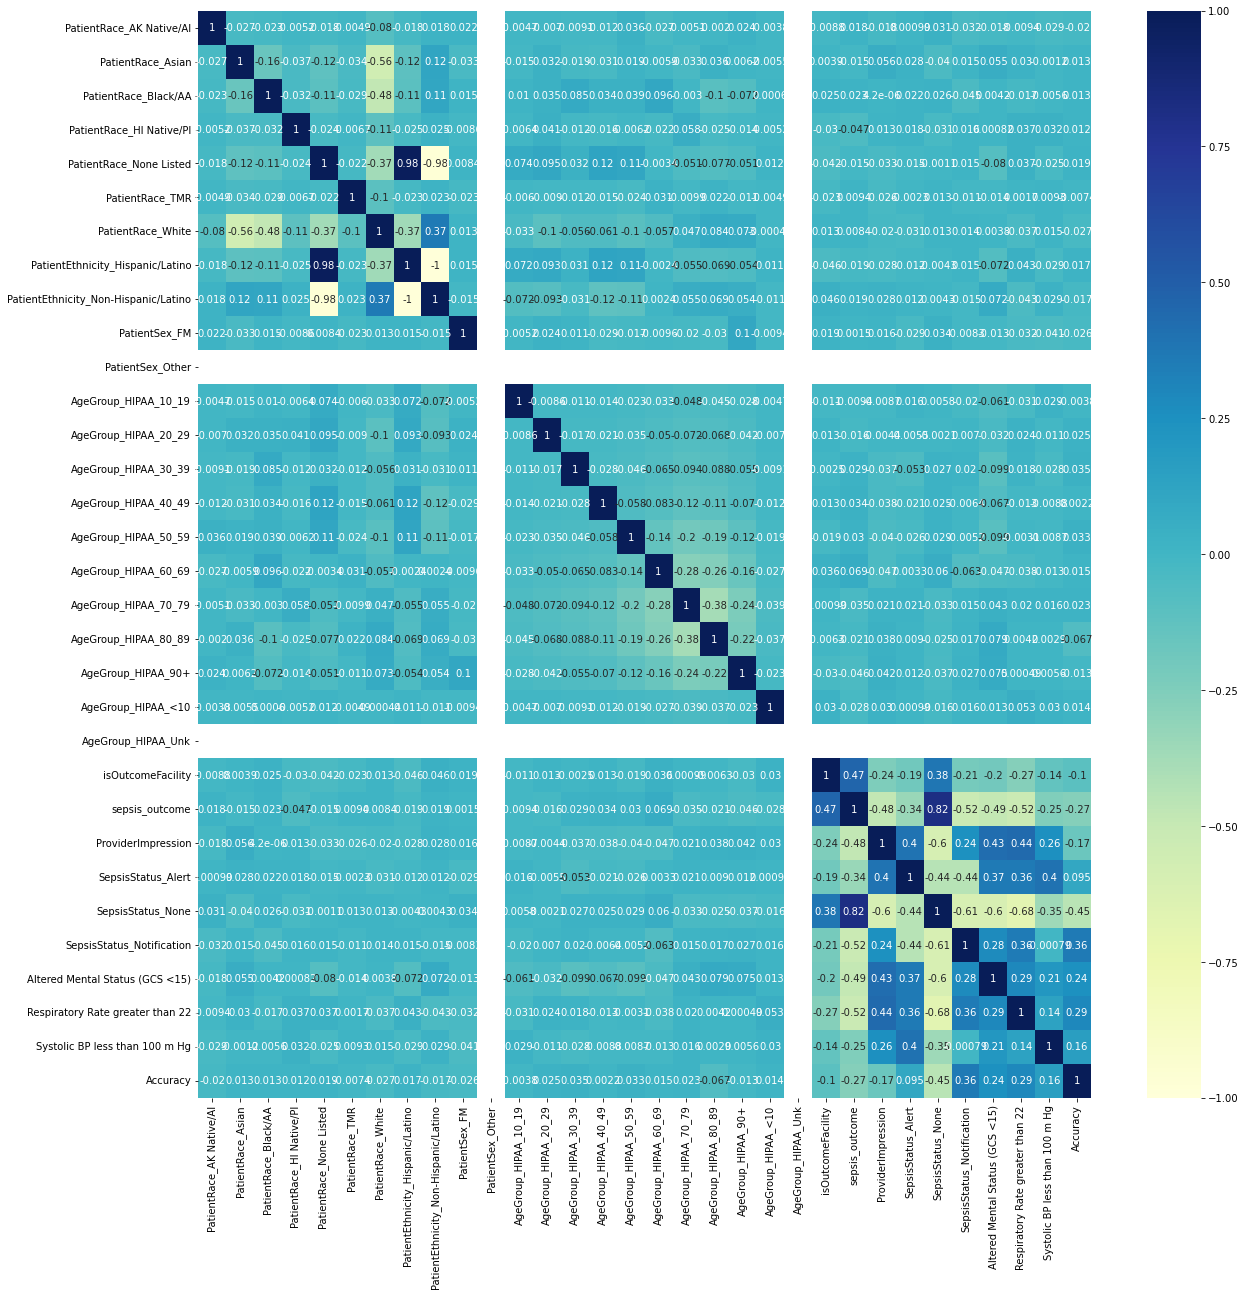

In [39]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#Checking the correlations among attributes.

plt.figure(figsize=(20,20))
sns.heatmap(PdmSEPSIS.corr(),cbar=True,annot=True,cmap='YlGnBu') #vmin=0.3, vmax=0.99,

In [40]:
#https://stackoverflow.com/questions/61956336/find-high-correlations-in-a-large-coefficient-matrix
#https://stackoverflow.com/questions/67711552/python-split-pandas-dataframe-by-range-of-values

coeff = PdmSEPSIS.corr()

# 0.3 is used for illustration 
# replace with your actual value
thresh_low = 0.3
thresh_high = 1

#mask = coeff.abs().lt(thresh)
# or mask = coeff> thresh
mask = (coeff> thresh_low) & (coeff < thresh_high) 

coeff.where(mask).stack()

# #Remove Diagonol
# corr = PdmSEPSIS.corr()
# import numpy as np
# np.fill_diagonal(corr.values, np.nan)
# print(corr)

PatientRace_None Listed               PatientEthnicity_Hispanic/Latino        0.983376
PatientRace_White                     PatientEthnicity_Non-Hispanic/Latino    0.366552
PatientEthnicity_Hispanic/Latino      PatientRace_None Listed                 0.983376
PatientEthnicity_Non-Hispanic/Latino  PatientRace_White                       0.366552
isOutcomeFacility                     sepsis_outcome                          0.466751
                                      SepsisStatus_None                       0.380140
sepsis_outcome                        isOutcomeFacility                       0.466751
                                      SepsisStatus_None                       0.815540
ProviderImpression                    SepsisStatus_Alert                      0.397450
                                      Altered Mental Status (GCS <15)         0.426467
                                      Respiratory Rate greater than 22        0.437558
SepsisStatus_Alert                    Provi

Text(0.5, 1.0, 'Correlations between 0.3 and 1.0')

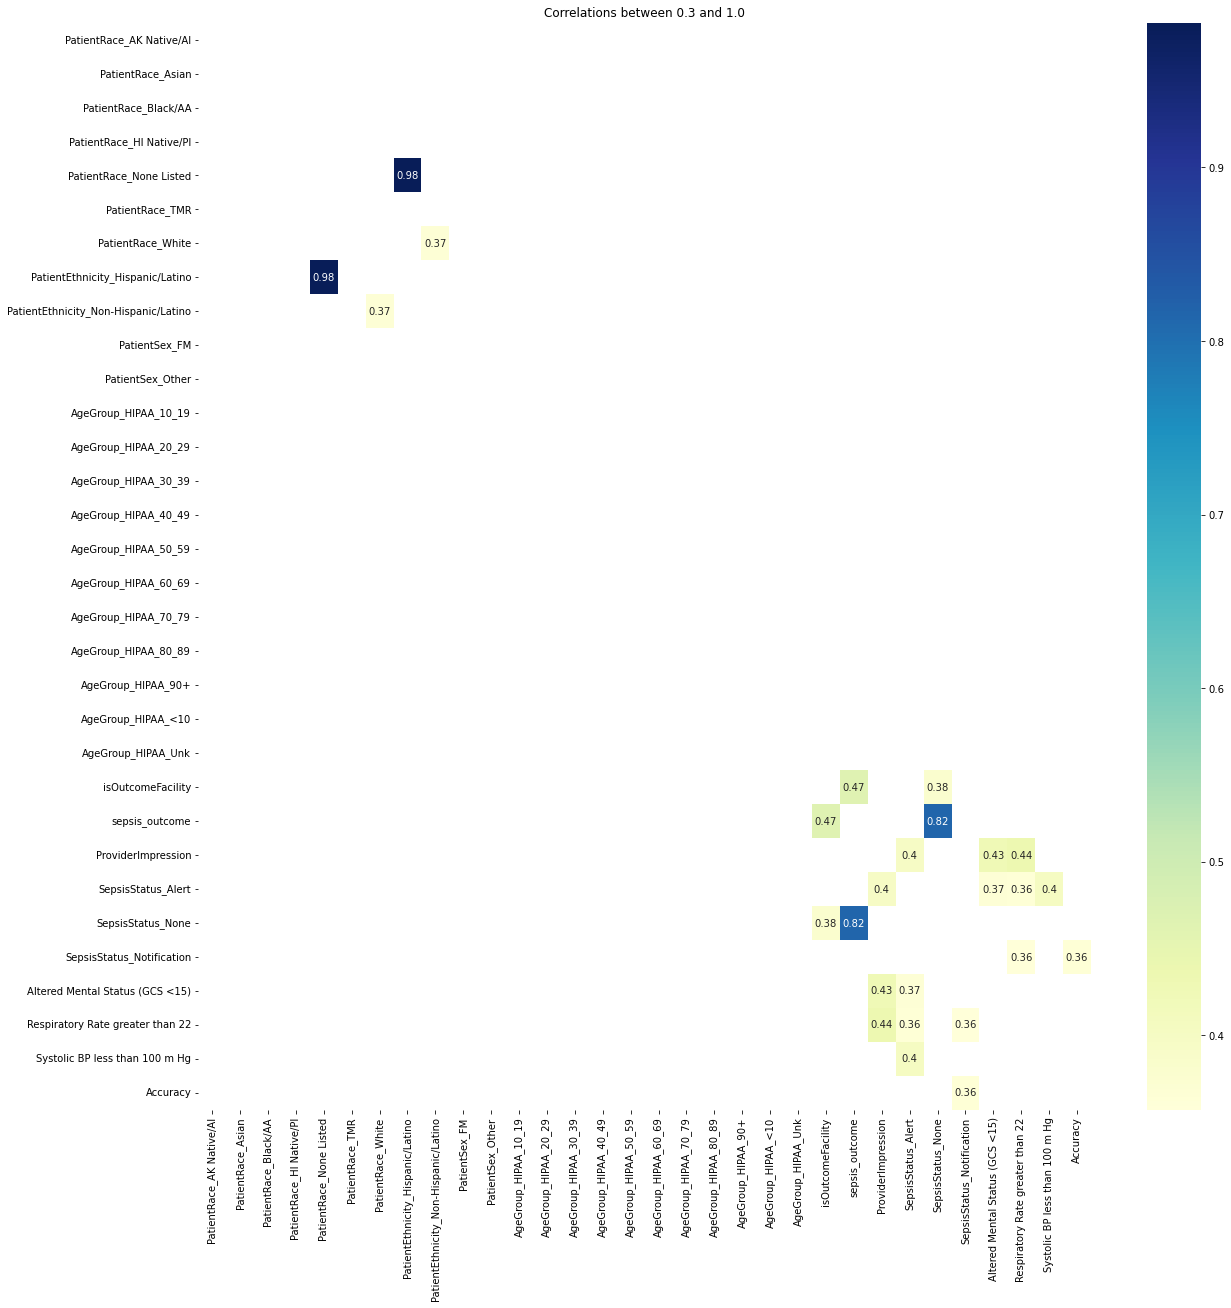

In [41]:
#Plot only the Correlations between 0.3 and 1.0

CorCoeff = coeff.where(mask)

plt.figure(figsize=(20,20))
sns.heatmap(CorCoeff,cbar=True,annot=True,cmap='YlGnBu') #.reshape(26,1)
plt.title('Correlations between 0.3 and 1.0')

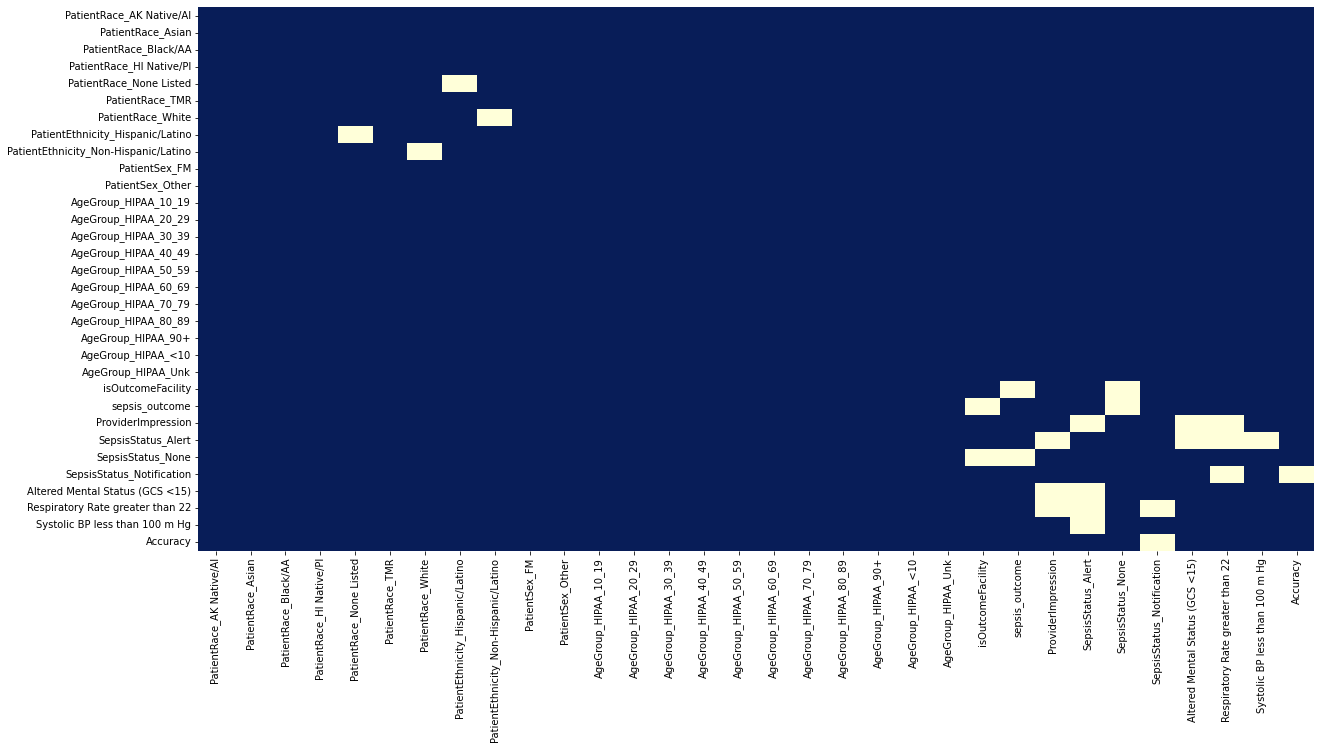

In [42]:
#Heat map of Nans
plt.figure(figsize=(20,10))
sns.heatmap(CorCoeff.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [43]:
#Lets drop irrelavant  columns:
PdmSEPSIS.drop(['Accuracy','Triage'],axis =1,  inplace =True)
print(PdmSEPSIS.head(3))
print("\n info: ", PdmSEPSIS.info())

   PatientRace_AK Native/AI  PatientRace_Asian  PatientRace_Black/AA  \
0                         0                  1                     0   
1                         0                  0                     0   
2                         0                  0                     0   

   PatientRace_HI Native/PI  PatientRace_None Listed  PatientRace_TMR  \
0                         0                        0                0   
1                         0                        0                0   
2                         0                        1                0   

   PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                  0                                 0   
1                  1                                 0   
2                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  PatientSex_FM  ...  \
0                                     1              1  ...   
1                                     1              0  ...

Prepare Data Set for Training

In [44]:
#Now you have to take off the Response column into y
import pandas as pd     # manipulate dataframe
import seaborn as sns   # visualization of classification

from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # to bring logistic regression
from sklearn.tree import DecisionTreeClassifier        # to bring decision tree
from sklearn.ensemble import RandomForestClassifier    # to bring random forest
from sklearn.model_selection import GridSearchCV       # to find best hyper parameters

from sklearn import metrics                            # to create confusion matrix

X = PdmSEPSIS.drop('sepsis_outcome',axis=1)
y = PdmSEPSIS['sepsis_outcome']

In [45]:
print ("\n Xhead: ",X.head(3))
print ("\n yhead: ",y.head(3))       


 Xhead:     PatientRace_AK Native/AI  PatientRace_Asian  PatientRace_Black/AA  \
0                         0                  1                     0   
1                         0                  0                     0   
2                         0                  0                     0   

   PatientRace_HI Native/PI  PatientRace_None Listed  PatientRace_TMR  \
0                         0                        0                0   
1                         0                        0                0   
2                         0                        1                0   

   PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                  0                                 0   
1                  1                                 0   
2                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  PatientSex_FM  ...  \
0                                     1              1  ...   
1                                     1          

In [46]:
#And then we are going to split this X and y into train and test data.
#https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1357)

# Logistic Regression & Multinomial Logistic Regression


In [47]:
#https://www.analyticsvidhya.com/blog/2017/08/skilltest-logistic-regression/
#Yes, we can apply logistic regression on 3 classification problem, We can use One Vs all method for 3 class classification in logistic regression.
#https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

LR = LogisticRegression()    # Bring empty logistic regression model

In [48]:
#Logistic regression uses maximum likely hood estimate for training a logistic regression.

LR.fit(x_train,y_train)      # Train the model with training data

LogisticRegression()

In [49]:
y_pred_LR = LR.predict(x_test)    # Get predicted y from the logistic regression model

In [50]:
# Get the classification accuracy, Recall, and Presicion with the metrics function.
LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Classification accuracy = ',LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'

Classification accuracy =  0.8767772511848341
Recall =  0.8767772511848341
Precision =  0.9014218009478673


In [51]:
#Check the class lable distribution
ytrain = pd.DataFrame(y_train)

Class_Distribution = pd.DataFrame(ytrain['sepsis_outcome'].value_counts())
Class_Distribution['Percentages'] = (Class_Distribution['sepsis_outcome']/Class_Distribution['sepsis_outcome'].sum())*100
Class_Distribution



,sepsis_outcome,Percentages
0,788,53.351388
1,689,46.648612


# Multinomial Logistic Regression

In [56]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
X, y = x_train, y_train
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.910 (0.026)


logistic regression model with default penalty achieved a mean classification accuracy of about 91 percent

calling the predict() function to make a prediction for new data

In [57]:
# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor()
# clf.fit(X,y)

##https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# # Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]

# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# # Split the targets into training/testing sets
# diabetes_y_train = diabetes_y[:-20]
# diabetes_y_test = diabetes_y[-20:]

# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(diabetes_X_train, diabetes_y_train)

# # Make predictions using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)

# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
# plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [58]:
#type(x_test)

# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
X, y = x_train, y_train
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
##row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
row = x_test
## predict the class label
#yhat = model.predict([row])
yhatt = model.predict(row)
## summarize the predicted class
#print('Predicted Class: %d' % yhat[0])
print("\n yhat: ", yhatt[0])

# The coefficients
print("\n Coefficients: \n", model.coef_)

# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat)) #could not convert string to float: 'UnderTriage'
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(y_test, yhat)) #ValueError: could not convert string to float: 'UnderTriage'

### Plot outputs
# plt.scatter(x_test, y_test, color="black")
# plt.plot(x_test, yhat, color="blue", linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show() #ValueError: x and y must be the same size



 yhat:  1

 Coefficients: 
 [[ 0.00656206  0.30406898 -0.02092463 -0.40665808  0.1881567  -0.20667338
   0.13695258 -0.06624845  0.06773269 -0.25739969  0.         -0.27981124
  -0.26126856  0.26565443  0.160424    0.32294191  0.21059167 -0.1029562
   0.04470578  0.0831871  -0.44198466  0.          1.86186834  0.03410992
  -1.21805008  2.50123454 -1.28170022 -0.01060952  0.30042844  0.1457486 ]]


In [65]:
#type(yhat)
#yhat.shape #(633,)
#yhat.dtype
#yhat[1]
np.where(yhatt == 0) #Check for the indexes
#np.where(yhatt == 'UnderTriage')
#np.where(yhatt == 'OverTriage')

(array([  6,   8,   9,  10,  14,  15,  16,  17,  19,  20,  21,  22,  23,
         24,  25,  26,  31,  32,  35,  38,  39,  40,  44,  45,  50,  53,
         54,  55,  57,  58,  59,  61,  62,  63,  67,  68,  70,  71,  72,
         74,  77,  79,  82,  84,  85,  86,  87,  88,  89,  94,  95,  96,
         97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 118,
        121, 122, 124, 125, 126, 127, 130, 131, 132, 133, 135, 136, 138,
        142, 144, 146, 147, 149, 153, 156, 157, 159, 160, 161, 163, 164,
        165, 167, 169, 171, 174, 176, 177, 180, 181, 182, 183, 187, 188,
        189, 192, 194, 195, 196, 197, 199, 200, 204, 205, 206, 207, 208,
        210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 225, 226, 228,
        230, 232, 234, 235, 236, 238, 239, 240, 241, 243, 244, 245, 246,
        248, 249, 250, 252, 254, 255, 257, 258, 259, 260, 261, 265, 266,
        269, 271, 272, 276, 281, 282, 283, 284, 285, 287, 289, 291, 292,
        293, 294, 295, 296, 297, 298, 301, 303, 305

In [66]:
# ### predict a multinomial probability distribution
yhat = model.predict_proba(row)
# summarize the predicted probabilities
print('\n Predicted Probabilities: %s' % yhat[0])


 Predicted Probabilities: [0.00342926 0.99657074]


In [ ]:
Class:        Predicted Probabilities:
        
1 :         Predicted Probabilities: [0.00303091 0.99696909]
0:          Predicted Probabilities: [0.00342926 0.99657074]

Triage:        Predicted Probabilities: [0.00330011 0.99221901 0.00448088]

OverTriage:    Predicted Probabilities: [0.9918642  0.00597873 0.00215706]

UnderTriage:   Predicted Probabilities: [9.15067953e-04 2.14479714e-03 9.96940135e-01]  


In [67]:
#https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get the dataset
def get_dataset():
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
    X, y = x_train, y_train
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
  

>0.0000 0.907 (0.026)
>0.0001 0.534 (0.002)
>0.0010 0.909 (0.027)
>0.0100 0.910 (0.025)
>0.1000 0.911 (0.026)
>1.0000 0.910 (0.026)


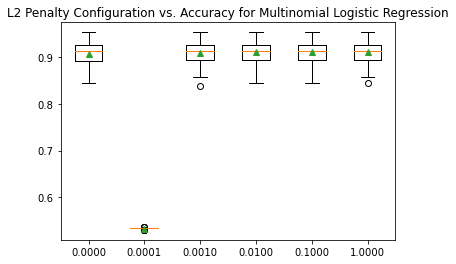

In [68]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('L2 Penalty Configuration vs. Accuracy for Multinomial Logistic Regression')
pyplot.show()  


#larger penalty we use on this dataset- the smaller the C value - the worse the performance of the model.
#L2 penalty with weighting values in the range from 0.0001 to 1.0 on a log scale
#no penalty or 0.0
C value 1.0 has the better accuracy score of 100% than no penalty of 0.00


# Support Vector Machine

In [69]:
#https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
#SVM 

#Import Library
from sklearn import svm
import numpy as np


X=x_train

y=y_train

model = svm.SVC() 
model.fit(X, y)
model.score(X, y)

0.9106296547054841

In [70]:
#predict 
print("\n predicted:\n\n", model.predict(x_test))
# get support vectors
print("\n support_vectors:\n\n",model.support_vectors_)
# get indices of support vectors
print("\n support:\n\n",model.support_)


 predicted:

 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0

In [71]:
##Multi-class classification
#https://www.baeldung.com/cs/svm-multiclass-classification#:~:text=SVM%20Multiclass%20Classification%20in%20Python&text=We%20developed%20two%20different%20classifiers,on%20the%20same%20data%20set.
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



#create two different classifiers, Polynomial kernel, and another one with RBF kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

#calculate the efficiency of the two models

poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

#calculate the accuracy and f1 scores for SVM with Polynomial kernel

poly_accuracy = accuracy_score(y_test, poly_pred) #percentage of the true positive and true negative to all data points
poly_f1 = f1_score(y_test, poly_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

#accuracy and f1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred) #percentage of the true positive and true negative to all data points
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#SVM hyperparameters, like C, gamma, and degree 
#f1 score when the data set isn’t balanced



Accuracy (Polynomial Kernel):  87.36
F1 (Polynomial Kernel):  87.20
Accuracy (RBF Kernel):  86.73
F1 (RBF Kernel):  86.52


In [72]:
# get number of support vectors for each class
model.n_support_

array([263, 172])

# DECISION TREE

In [73]:
DTC = DecisionTreeClassifier()    # Bring empty decision tree model
                                  # you can set the name whatever you want. it doesn't need to be "DTC"
    
DTC.fit(x_train,y_train)          # Train the decision tree model with training data

y_pred_DTC = DTC.predict(x_test)  # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_DTC,y_test)  # Get the classification accuracy
print(Decision_accuracy)

0.8467614533965245


GRID SEARCH METHOD

In [74]:
grid_DTC = DecisionTreeClassifier()    # Bring empty decision tree

# Prepare the combination of parameters.
param_dist={"criterion":["gini","entropy"],       # 2 options for criterion
            'max_depth': range(2,8),              # 6 options for max_depth
            'max_leaf_nodes': range(50,150,50)}   # 2 options for max_leaf_nodes
# So, the total number of combination is 2*6*2 = 24

# cv means cross validation and this concept will come in the future
grid_DTC = GridSearchCV(grid_DTC, param_grid= param_dist, cv=5, n_jobs=-1)   
#Number of jobs to run in parallel.  -1 means using all processors. 

grid_DTC.fit(x_train, y_train)     # Fit all of the 24 combinations


best_parameters = grid_DTC.best_params_   # Get best parameters 
print(best_parameters)

# Create a decision tree with best parameters and train it with whole train data
after_grid_DTC = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_leaf_nodes= 50, random_state= 1357)
after_grid_DTC = after_grid_DTC.fit(x_train, y_train)

y_pred_grid = after_grid_DTC.predict(x_test)     # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_grid,y_test)
print(Decision_accuracy)

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 50}
0.8720379146919431


# RANDOM FOREST

In [75]:
RF = RandomForestClassifier(100,n_jobs=-1,random_state=1357)   # Bring empty random forest model, 100 is the number of trees in the RF
RF.fit(x_train,y_train)   # Train the model with training data

y_pred_RF = RF.predict(x_test)   # Get predicted y from the random forest model

# Get the classification accuracy, Recall, and Presicion with the metrics function.
print('Accucary = ',metrics.accuracy_score(y_pred_RF,y_test))
print('Recall = ',metrics.recall_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'

Accucary =  0.8593996840442338
Recall =  0.8593996840442338
Precision =  0.8726545520926714


Visualize the confusion metrics

<AxesSubplot:>

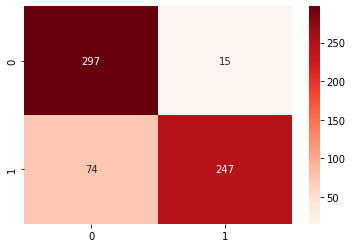

In [76]:
cm = metrics.confusion_matrix(y_test, y_pred_RF)    # Create a confusion matrix from your predicted y and original y value.
                                                    # In this code, we use the result of random forest, but you can replace with another classifier

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from the seaborn and fit our confusion matrix
                                                    # annot = True can shows the confusion matrix values
                                                    # camp can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values

ROC curve

In [ ]:
# With false_positive_rate and true_positive_rate, we can plot the ROC curve.

# To get false_positive_rate and true_positive_rate, we need to use predicted probability and actual labels.

# y_pred_proba = RF.predict_proba(x_test)   # Get the probability of classification from the Random Forest model
#                                           # In this code, we use the result of random forest, but you can replace with another classifier

# false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])     
# # Orignally predict_proba return 2 values for both class. 
# # So, we picked second one which give the probability of class 1 #ValueError: multiclass format is not supported

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline  
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.title('ROC')
# plt.plot(false_positive_rate, true_positive_rate)  
# # By simply ploting false positive rate and true positive rate, you can plot the roc curve

In [ ]:
#Area Under the Curve
# auc = metrics.auc(false_positive_rate, true_positive_rate)   # metrics also privide the auc area
# print(auc)

# Vizualizations:

In [50]:
#https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4
#Plotly Dash
#pip install dash --Anaconda Prompt
#pip install jupyter-dash
# ! pip install dash-html-components                                         
# ! pip install dash-core-components                                     
# ! pip install plotly
# from dash import Dash, html, dcc, Input, Output
# import pandas as pd
# import plotly.express as px
#https://plotly.com/python/dot-plots/
#import dash package

import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.express as px

df = PdmSEPSIS 

fig = px.scatter(df, y="ProviderImpression", x="sepsis_outcome", color="Triage", symbol = "Triage")
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source).mark_circle(size=60).encode(
    x='ProviderImpression',
    y='Triage',
    color='SepsisStatus_Alert',
    tooltip=['PatientSex_Female', 'SepsisStatus_Alert', 'ProviderImpression', 'Triage']
).interactive()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Triage:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['SepsisStatus_Alert', 'ProviderImpression', 'Accuracy'],
    column=['Accuracy', 'ProviderImpression', 'SepsisStatus_Alert']
).interactive()

In [ ]:
import altair as alt
import pandas as pd
import numpy as np



source = PdmSEPSIS

base = alt.Chart(source).mark_circle(opacity=0.5).transform_fold(
    fold=['Accuracy', 'ProviderImpression', 'SepsisStatus_Alert'],
    as_=['category', 'y']
).encode(
    alt.X('Triage:N'),
    alt.Y('y:Q'),
    alt.Color('category:N')
)

base + base.transform_loess('Triage', 'y', groupby=['category']).mark_line(size=4)

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source, title="The FFS Performance").mark_point().encode(
    alt.X(
        'ProviderImpression:N',
        title="ProviderImpression",
        scale=alt.Scale(zero=False),
        axis=alt.Axis(grid=False)
    ),
    alt.Y(
        'Triage:N',
        title="",
        sort='-x',
        axis=alt.Axis(grid=True)
    ),
    color=alt.Color('sepsis_outcome:N', legend=alt.Legend(title="sepsis_outcome")),
    row=alt.Row(
        'SepsisStatus_Alert:N',
        title="",
        sort=alt.EncodingSortField(field='ProviderImpression', op='sum', order='descending'),
    )
).properties(
    height=alt.Step(20)
).configure_view(stroke="transparent")

In [ ]:
#How does Providor Impression affects the Outcome
plt.figure(figsize=(10,10))
plt.scatter(x='ProviderImpression',y='sepsis_outcome',data=PdmSEPSIS)
plt.xlabel('ProviderImpression')
plt.ylabel('sepsis_outcome')

# #How does Providor Impression affects the Triage
# plt.figure(figsize=(10,10))
# plt.scatter(x='ProviderImpression',y='Triage',data=PdmSEPSIS)
# plt.xlabel('ProviderImpression')
# plt.ylabel('Triage')

In [ ]:
#Count Nulls
print(PdmSEPSIS.isnull().sum())

In [ ]:
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PdmSEPSIS.isnull(),cbar=False,cmap='viridis')

In [ ]:
# PdmSEPSIS.groupby(['AgeGroup_HIPAA','Accuracy'])['Accuracy'].count().unstack().plot(legend=True)
# plt.title('AgeGroup_HIPAA and Accuracy')
# plt.xlabel('AgeGroup_HIPAA')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
#Multi-panel Scatter Plot with Linked Brushing
source = PdmSEPSIS

selection = alt.selection_multi(fields=['Accuracy'], bind='legend')


Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   

    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
 
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
).add_selection(
    selection
).add_selection(brush)
Accuracy.display()

In [ ]:
#Chart for reference

source = PdmSEPSIS
#.mark_line()/.mark_bar()/.mark_point()
#scales = alt.selection_interval(bind='scales')  
# interval = alt.selection_interval()
# make_example(interval)
Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   
#   alt.X('AgeGroup_HIPAA:N', axis=alt.Axis(domain=False, tickSize=0)),
#   alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population',stack='center', axis=None),
    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
    #opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
    ).add_selection(
    selection
    ).add_selection(brush).interactive()
Accuracy.display()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS
selection = alt.selection_multi(fields=['Accuracy'], bind='legend')
PatSEPSISChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='Triage:N',
    column='SepsisStatus:N',
    tooltip=['Triage', 'sepsis_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
    ).interactive()
PatSEPSISChart .display()
#PatDemChart.save('PatDemChart.html')

# Repeat the same process for STEMI

In [ ]:
#View Header and count null

print("\n header:\n",STEMI.head(2))

print("\n count null before merge:\n", STEMI.isnull().sum())

In [ ]:
#Check if any columns or values are duplicated.
#STEMI['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STEMI.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STEMI['EmergencyDepartmentDiagnosis'].equals(STEMI['HospitalDiagnosis']))

print("\n Primary and Secondary Impression Duplicated?: ",STEMI['PrimaryImpression'].equals(STEMI['SecondaryImpression']))

# print("\n Race Duplicated?           : ",STEMI['Patient_Race_List_Raw'].equals(STEMI['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STEMI['Patient_Gender_Raw'].equals(STEMI['PatientGender']))

In [ ]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STEMIclean = STEMI

#STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].astype(str) + STEMIclean["HospitalDiagnosis"].astype(str)
STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].fillna('') + STEMIclean["HospitalDiagnosis"].fillna('')

##drop reduntant columns
#STEMI.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STEMIclean.head(2))

print("\n count null after merge:\n", STEMIclean.isna().sum())

In [ ]:
#STEMIclean.dtypes
#print("\n count NaN after merge:\n",STEMIclean[STEMIclean == 'nannan'].count()) #975
print("\n count NaN after merge:\n",STEMIclean[STEMIclean == ''].count()) #975
#STEMIclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()

In [ ]:
STEMIclean.head(10)

In [ ]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

STEMIclean["STEMI_outcome"] = pd.np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False), 1, 0)

#pd.np.where(STEMIclean["overall_diagnosis"].str.contains("(STEMI)", na=False, case=False), "1", 
                                #pd.np.where(STEMIclean["overall_diagnosis"].str.contains("STEMI", na=False), "1",
                                #)#)
print(STEMIclean.head())
#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

In [ ]:
## create a new column that is STEMI if the PrimaryImpression column contains the string "STEMI", Other if not
STEMIclean["PrimaryImpr"] = pd.np.where(STEMIclean["PrimaryImpression"].str.contains("CV - STEMI", na=False, case=False), "STEMI","Other")   
                            
                            #pd.np.where(STEMIclean["PrimaryImpression"].str.contains("I21.0" or "I21.1" or "I21.2", na=False, case=False), "STEMI", "Other")   
                            
print(STEMIclean.head())





#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

In [ ]:
print("\n PImpressions Values: \n", STEMIclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STEMIclean['PrimaryImpr'].unique())
#print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())

In [ ]:
##Drop redundant column 
STEMIclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STEMIclean.head()

In [ ]:
# merging the files how='inner' by default.
PdmSTEMI = pd.merge(PatDemo,STEMI, on='PtIDInternal') 
print(PdmSTEMI.head())
#Write as .csv
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

In [ ]:
print(PdmSTEMI.head())
print(PdmSTEMI.columns)

In [ ]:
import altair as alt
#from vega_datasets import data

source = PdmSTEMI

PatSTEMIChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='STEMIstatus:N',
    tooltip=['PrimaryImpr', 'STEMI_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTEMIChart .display()
#PatDemChart.save('PatDemChart.html')

# REPEAT Process for STROKE

In [ ]:
#View Header and count null

print("\n header:\n",STROKE.head(2))

print("\n count null before merge:\n", STROKE.isnull().sum())

In [ ]:
#Check if any columns or values are duplicated.
#STROKE['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STROKE.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STROKE['EmergencyDepartmentDiagnosis'].equals(STROKE['HospitalDiagnosis']))
print("\n Primary and Secondary Impression Duplicated?: ",STROKE['PrimaryImpression'].equals(STROKE['SecondaryImpression']))
# print("\n Race Duplicated?           : ",STROKE['Patient_Race_List_Raw'].equals(STROKE['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STROKE['Patient_Gender_Raw'].equals(STROKE['PatientGender']))

In [ ]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STROKEclean = STROKE

STROKEclean["overall_diagnosis"] = STROKEclean["EmergencyDepartmentDiagnosis"].astype(str) + STROKEclean["HospitalDiagnosis"].astype(str)

##drop reduntant columns
#STROKE.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STROKEclean.head(2))

print("\n count null after merge:\n", STROKEclean.isna().sum())

In [ ]:
#STROKEclean.dtypes
print("\n count NaN after merge:\n",STROKEclean[STROKEclean == 'nannan'].count())
#STROKEclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()

In [ ]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
#https://www.icd10data.com/ICD10CM/Codes/I00-I99/I60-I69/I63-/I63.9#:~:text=Cerebral%20infarction%2C%20unspecified,-2016%202017%202018&text=Billable%2FSpecific%20Code-,I63.,effective%20on%20October%201%2C%202021.

STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1", 
                                #pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False), "1",
                                pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I63.9", na=False, case=False), "1", "0"))#)

print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

In [ ]:
## create a new column that is Sepsis if the PrimaryImpression column contains the string "Sepsis", Other if not

STROKEclean["PrimaryImpr"] = pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE", 
                               
                             pd.np.where(STROKEclean["PrimaryImpression"].str.contains("I6", na=False, case=False), "STROKE", "Other"))
print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

In [ ]:
print("\n PImpressions Values: \n", STROKEclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STROKEclean['PrimaryImpr'].unique())


In [ ]:
##Drop redundant column 
STROKEclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STROKEclean.head()

In [ ]:
# merging the files how='inner' by default.
PdmSTROKE = pd.merge(PatDemo,STROKE, on='PtIDInternal') 
print(PdmSTROKE.head())
#Write as .csv
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)


In [ ]:
import altair as alt
#from vega_datasets import data

source = PdmSTROKE

PatSTROKEChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='StrokeStatus:N',
    tooltip=['PrimaryImpr', 'STROKE_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTROKEChart .display()
#PatDemChart.save('PatDemChart.html')

# Finding out the common patients across all data sets.

In [ ]:
# merging the files how='inner' by default.
#PdmMerged = pd.merge(PatDemo,SEPSIS,STEMI,STROKE, on='PtIDInternal') 
PdmMerged = PatDemo.merge(SEPSIS, on='PtIDInternal').merge(STEMI,on='PtIDInternal').merge(STROKE,on='PtIDInternal')
PdmMerged 

#Alternatively
#df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
# print(df4)
# #Write as .csv
# df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

In [ ]:
# import altair as alt
# from vega_datasets import data

# chart = alt.Chart(data.cars.url).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N'
# )

# chart.save('chart.html')

In [ ]:
 #Anaconda Prompt-jupyter notebook list-for token